# 주식 데이터 분석 프로젝트 (Week 1)

## 프로젝트 목표
- 주식 데이터를 수집하고 기본 통계/시각화를 수행한다.
- Pandas와 Matplotlib의 기본 사용법을 익힌다.
- 금융 도메인 데이터를 활용해 실무 감각을 키운다.

## 학습 목표 (이번 노트북에서 달성할 것)
- `yfinance`로 주가 데이터를 수집할 수 있다.
- Pandas DataFrame의 기본 구조를 이해한다.
- 한글 폰트 설정과 시각화 기본 규칙을 적용한다.

## Java 개발자 관점의 비유
- Pandas DataFrame ≈ Java의 `List<Map<String, Object>>`
- 시계열 데이터 처리 ≈ Java Stream API로 날짜별 집계


In [1]:
# =============================================================================
# 1. 라이브러리 임포트
# =============================================================================
# 학습 목표: 데이터 수집/분석/시각화를 위한 핵심 라이브러리를 준비한다
# Java 비유: Maven/Gradle로 의존성 추가 후 import 하는 단계와 유사

import yfinance as yf  # 주가 데이터 수집용 라이브러리
import pandas as pd  # 표 형태 데이터 처리 (Java의 List<Map> 유사)
import matplotlib.pyplot as plt  # 기본 시각화 라이브러리
import seaborn as sns  # 통계 시각화 스타일 개선


Matplotlib is building the font cache; this may take a moment.


In [2]:
# =============================================================================
# 2. 한글 폰트 설정
# =============================================================================
# 학습 목표: 한글이 깨지지 않도록 시각화 환경을 설정한다
# Java 비유: JVM 옵션이나 로케일 설정을 맞추는 작업과 유사

plt.rcParams["font.family"] = "AppleGothic"  # Mac 기본 한글 폰트
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지


In [3]:
# =============================================================================
# 3. 데이터 수집 준비
# =============================================================================
# 학습 목표: 수집 대상과 기간, 경로를 표준화해 재사용 가능한 설정을 만든다
# Java 비유: 설정 클래스를 만들어 공통 파라미터를 관리하는 패턴과 유사

from datetime import datetime, timedelta
from pathlib import Path

# 데이터 디렉토리 경로 설정
BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "data"
OUTPUT_DIR = BASE_DIR / "outputs"

# 데이터/결과 폴더 자동 생성 (없으면 생성)
DATA_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# 분석 대상 종목 (한국 주식 3종목)
TICKERS = [
    "005930.KS",  # 삼성전자
    "000660.KS",  # SK하이닉스
    "035420.KS",  # NAVER
]

# 수집 기간 설정 (최근 1년)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# yfinance 다운로드 옵션
YFINANCE_INTERVAL = "1d"

# 설정 확인용 출력 (추후 데이터 수집 시 재사용)
print("📌 수집 대상:", TICKERS)
print("📌 기간:", start_date.date(), "~", end_date.date())
print("📌 데이터 경로:", DATA_DIR)
print("📌 출력 경로:", OUTPUT_DIR)


📌 수집 대상: ['005930.KS', '000660.KS', '035420.KS']
📌 기간: 2025-01-19 ~ 2026-01-19
📌 데이터 경로: /Users/ydk/ai-learning/week1/data
📌 출력 경로: /Users/ydk/ai-learning/week1/outputs


In [4]:
# =============================================================================
# 4. yfinance로 데이터 수집 및 DataFrame 생성
# =============================================================================
# 학습 목표: yfinance 사용법을 익히고 종목별 DataFrame을 만든다
# Java 비유: REST API 호출 결과를 종목별 Map<String, List<...>>로 저장하는 것과 유사

stock_data = {}

for ticker in TICKERS:
    try:
        df = yf.download(
            ticker,
            start=start_date,
            end=end_date,
            interval=YFINANCE_INTERVAL,
            progress=False,
        )
    except ValueError as e:
        print(f"❌ 잘못된 티커: {ticker} / {e}")
        continue
    except RuntimeError as e:
        print(f"❌ 네트워크/다운로드 오류: {ticker} / {e}")
        continue

    if df.empty:
        print(f"⚠️ 데이터가 비어 있습니다: {ticker}")
        continue

    stock_data[ticker] = df

# 종목별 DataFrame 변수 생성 (명시적으로 분리)
samsung_df = stock_data.get("005930.KS")
sk_hynix_df = stock_data.get("000660.KS")
naver_df = stock_data.get("035420.KS")

print("✅ 수집 완료 종목:", list(stock_data.keys()))


✅ 수집 완료 종목: ['005930.KS', '000660.KS', '035420.KS']


In [5]:
# =============================================================================
# 5. 데이터 기본 탐색
# =============================================================================
# 학습 목표: Pandas DataFrame의 기본 메서드를 사용해 구조를 파악한다
# Java 비유: List<Map>의 size/keys/샘플 데이터 확인과 유사

def explore_df(name: str, df: pd.DataFrame | None) -> None:
    """
    데이터프레임 기본 정보를 출력한다.

    Args:
        name (str): 종목명 라벨
        df (pd.DataFrame | None): 종목별 데이터프레임
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return

    print(f"\n===== {name} =====")
    print("\n[1] df.info() - 데이터 구조")
    df.info()

    print("\n[2] df.describe() - 통계 요약")
    print(df.describe())

    print("\n[3] df.head(10) - 처음 10행")
    print(df.head(10))

    print("\n[4] df.tail(10) - 마지막 10행")
    print(df.tail(10))

    print("\n[5] df.columns - 컬럼명")
    print(list(df.columns))

    print("\n[6] df.shape - 크기")
    print(df.shape)


# 종목별 탐색 실행
explore_df("삼성전자", samsung_df)
explore_df("SK하이닉스", sk_hynix_df)
explore_df("NAVER", naver_df)



===== 삼성전자 =====

[1] df.info() - 데이터 구조
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2025-01-20 to 2026-01-19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, 005930.KS)   241 non-null    float64
 1   (High, 005930.KS)    241 non-null    float64
 2   (Low, 005930.KS)     241 non-null    float64
 3   (Open, 005930.KS)    241 non-null    float64
 4   (Volume, 005930.KS)  241 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.3 KB

[2] df.describe() - 통계 요약
Price           Close           High            Low           Open  \
Ticker      005930.KS      005930.KS      005930.KS      005930.KS   
count      241.000000     241.000000     241.000000     241.000000   
mean     75273.586327   76154.907292   74232.066712   75102.900578   
std      24364.360343   24691.616156   23671.390505   24067.464951   
min      50165.886719   50559.344654   49969.157751   502

In [6]:
# =============================================================================
# 6. 결측치 확인 및 처리 방법 제시
# =============================================================================
# 학습 목표: 결측치 확인 로직을 익히고 기본 처리 전략을 이해한다
# Java 비유: null 체크 및 기본값 처리(예: Optional.orElse)와 유사

def check_missing(name: str, df: pd.DataFrame | None) -> None:
    """
    결측치 요약과 처리 방법을 안내한다.

    Args:
        name (str): 종목명 라벨
        df (pd.DataFrame | None): 종목별 데이터프레임
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return

    print(f"\n===== {name} 결측치 확인 =====")
    null_summary = df.isnull().sum()
    print(null_summary)

    if null_summary.sum() > 0:
        print("\n✅ 결측치 처리 방법 제시")
        print("- 방법 1: 행 제거 -> df.dropna()")
        print("- 방법 2: 앞/뒤 값으로 채우기 -> df.fillna(method='ffill')")
        print("- 방법 3: 선형 보간 -> df.interpolate()")
    else:
        print("✅ 결측치 없음")


# 종목별 결측치 확인 실행
check_missing("삼성전자", samsung_df)
check_missing("SK하이닉스", sk_hynix_df)
check_missing("NAVER", naver_df)



===== 삼성전자 결측치 확인 =====
Price   Ticker   
Close   005930.KS    0
High    005930.KS    0
Low     005930.KS    0
Open    005930.KS    0
Volume  005930.KS    0
dtype: int64
✅ 결측치 없음

===== SK하이닉스 결측치 확인 =====
Price   Ticker   
Close   000660.KS    0
High    000660.KS    0
Low     000660.KS    0
Open    000660.KS    0
Volume  000660.KS    0
dtype: int64
✅ 결측치 없음

===== NAVER 결측치 확인 =====
Price   Ticker   
Close   035420.KS    0
High    035420.KS    0
Low     035420.KS    0
Open    035420.KS    0
Volume  035420.KS    0
dtype: int64
✅ 결측치 없음


## 전처리 및 파생 변수 생성

### 학습 포인트
- `pct_change()`는 **벡터 연산**으로 일괄 계산되며, Java Stream처럼 요소별 반복이 아니라 내부 최적화가 적용된다.
- `rolling()`은 **윈도우(window)** 단위로 집계/통계를 계산하는 개념으로, Java에서 고정 길이 슬라이딩 버퍼를 유지하며 집계하는 방식과 유사하다.
- 벡터 연산은 파이썬 루프 대비 훨씬 빠르고 코드가 간결하다.

### 금융 실무 의미
- **일별 수익률**: 리스크/성과 측정의 기본 입력값
- **이동평균선(MA)**: 추세 판단 및 매매 시그널의 기초
- **거래대금**: 유동성(매매 가능성)과 시장 관심도 지표
- **변동성(20일 표준편차)**: 리스크 크기와 가격 불안정성 측정


In [7]:
# =============================================================================
# 7. 전처리 및 파생 변수 생성
# =============================================================================
# 학습 목표: 수익률/이동평균/거래대금/변동성을 파생 변수로 만든다
# Java 비유: List<Map>에 계산 컬럼을 추가하는 전처리 파이프라인과 유사

def add_features(name: str, df: pd.DataFrame | None) -> pd.DataFrame | None:
    """
    전처리 및 파생 변수를 생성한다.

    Args:
        name (str): 종목명 라벨
        df (pd.DataFrame | None): 종목별 데이터프레임

    Returns:
        pd.DataFrame | None: 파생 변수가 추가된 데이터프레임
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return None

    df = df.copy()

    # 1) 일별 수익률 (%): 전일 대비 종가 변화율
    # - pct_change()는 내부적으로 벡터 연산을 사용해 빠르게 계산
    df["return_pct"] = df["Close"].pct_change() * 100

    # 2) 이동평균선: 단기/중기/장기 추세 파악
    # - rolling(window=N)은 최근 N일 구간을 윈도우로 계산
    df["ma5"] = df["Close"].rolling(window=5).mean()
    df["ma20"] = df["Close"].rolling(window=20).mean()
    df["ma60"] = df["Close"].rolling(window=60).mean()

    # 3) 거래대금: 거래량 * 종가
    df["trading_value"] = df["Volume"] * df["Close"]

    # 4) 변동성(20일): 일별 수익률의 표준편차
    df["volatility_20"] = df["return_pct"].rolling(window=20).std()

    print(f"✅ 파생 변수 생성 완료: {name}")
    return df


# 종목별 파생 변수 적용
samsung_df = add_features("삼성전자", samsung_df)
sk_hynix_df = add_features("SK하이닉스", sk_hynix_df)
naver_df = add_features("NAVER", naver_df)


✅ 파생 변수 생성 완료: 삼성전자
✅ 파생 변수 생성 완료: SK하이닉스
✅ 파생 변수 생성 완료: NAVER


## 기본 차트 시각화 (금융 리포트 수준)

### 학습 포인트
- 여러 종목을 **한 그래프**에 비교해 시장 흐름을 파악한다.
- 이동평균선을 함께 표시해 **추세 변화**를 쉽게 읽는다.
- 거래량은 상승/하락일 색상으로 **수급 강도**를 시각화한다.
- 수익률 분포로 **리스크(변동성) 특성**을 확인한다.

### 실무 의미
- 리서치 보고서의 기본 구성 요소로 활용 가능
- 투자 의사결정 시 추세/리스크/유동성 확인에 핵심


/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:30: Us

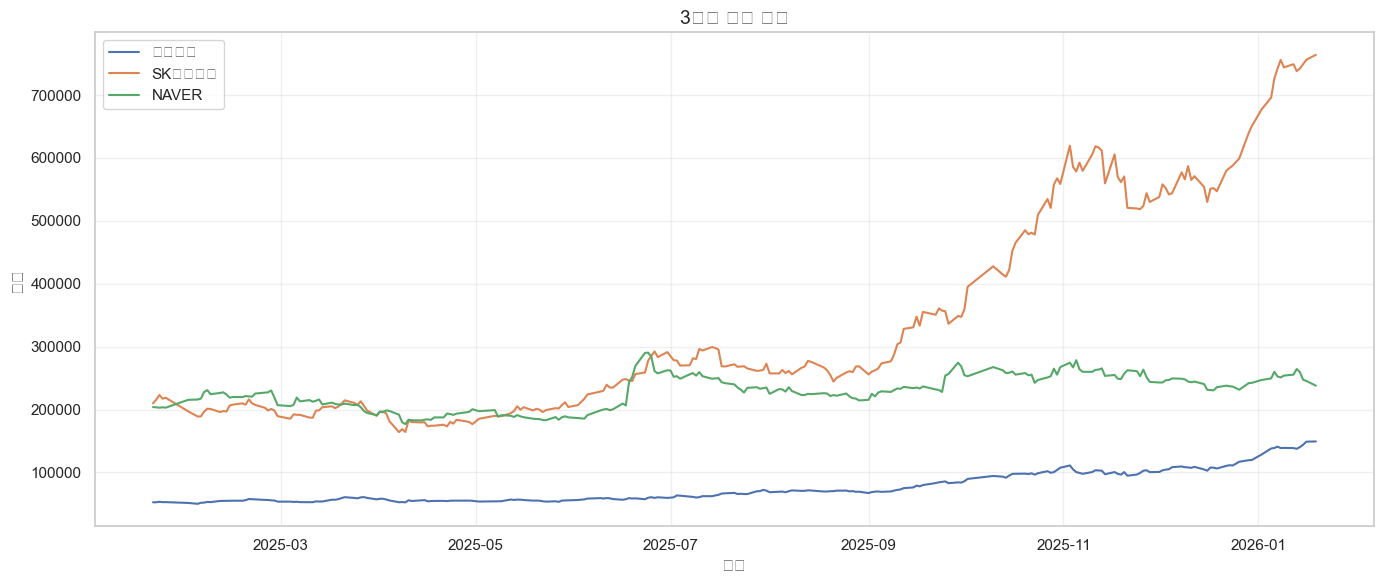

/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/2729584601.py:51: U

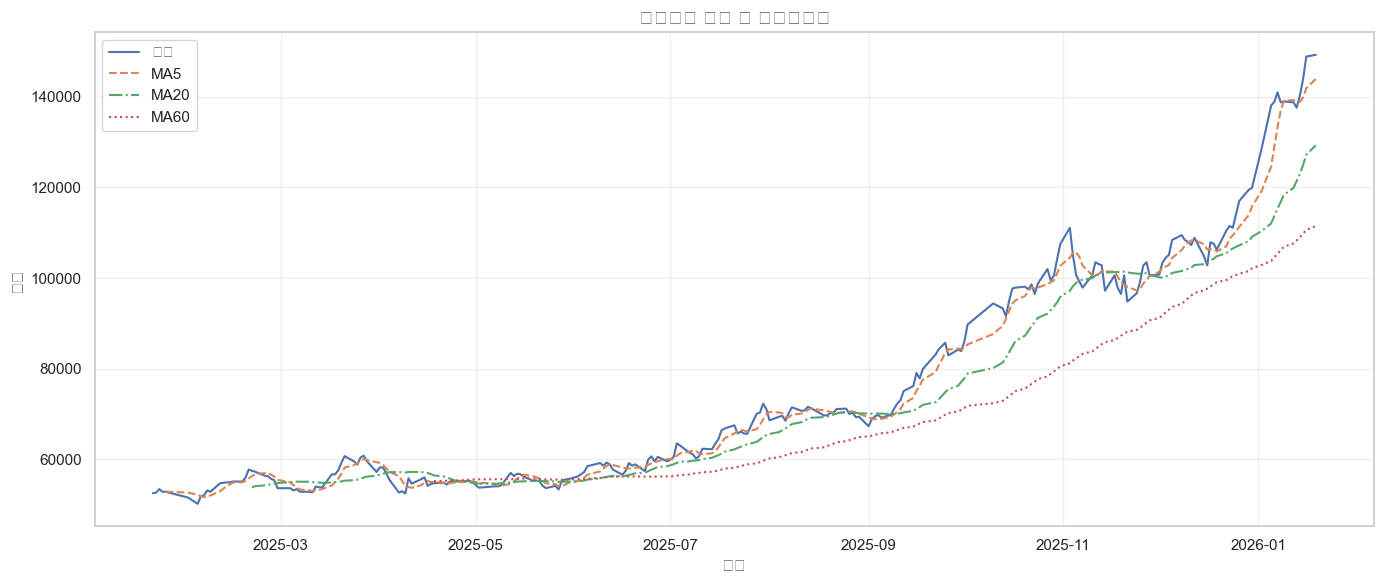

TypeError: '>=' not supported between instances of 'str' and 'int'

In [8]:
# =============================================================================
# 8. 기본 차트 시각화
# =============================================================================
# 학습 목표: 금융 리포트에 적합한 기본 차트를 만든다
# Java 비유: 리포트 템플릿에 그래프를 생성해 삽입하는 단계와 유사

sns.set_theme(style="whitegrid")  # 시각화 기본 테마

# 안전 체크 함수 (데이터가 없으면 스킵)
def ensure_df(name: str, df: pd.DataFrame | None) -> bool:
    if df is None or df.empty:
        print(f"⚠️ 차트 생성 스킵: {name} 데이터 없음")
        return False
    return True

# -----------------------------------------------------------------------------
# 1) 3종목 종가 추이 (한 그래프)
# -----------------------------------------------------------------------------
if ensure_df("삼성전자", samsung_df) and ensure_df("SK하이닉스", sk_hynix_df) and ensure_df("NAVER", naver_df):
    plt.figure(figsize=(14, 6))
    plt.plot(samsung_df.index, samsung_df["Close"], label="삼성전자")
    plt.plot(sk_hynix_df.index, sk_hynix_df["Close"], label="SK하이닉스")
    plt.plot(naver_df.index, naver_df["Close"], label="NAVER")

    plt.title("3종목 종가 추이", fontsize=14)
    plt.xlabel("날짜")
    plt.ylabel("종가")
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    output_path = OUTPUT_DIR / "close_prices_3stocks.png"
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------------------------------------------------------
# 2) 삼성전자 종가 + 이동평균선 (MA5/MA20/MA60)
# -----------------------------------------------------------------------------
if ensure_df("삼성전자", samsung_df):
    plt.figure(figsize=(14, 6))
    plt.plot(samsung_df.index, samsung_df["Close"], label="종가", linewidth=1.5)
    plt.plot(samsung_df.index, samsung_df["ma5"], label="MA5", linestyle="--")
    plt.plot(samsung_df.index, samsung_df["ma20"], label="MA20", linestyle="-.")
    plt.plot(samsung_df.index, samsung_df["ma60"], label="MA60", linestyle=":")

    plt.title("삼성전자 종가 및 이동평균선", fontsize=14)
    plt.xlabel("날짜")
    plt.ylabel("가격")
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    output_path = OUTPUT_DIR / "samsung_ma.png"
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------------------------------------------------------
# 3) 거래량 차트 (상승일/하락일 색상 구분)
# -----------------------------------------------------------------------------
if ensure_df("삼성전자", samsung_df):
    price_diff = samsung_df["Close"].diff()
    volume_colors = ["red" if diff >= 0 else "blue" for diff in price_diff]

    plt.figure(figsize=(14, 5))
    plt.bar(samsung_df.index, samsung_df["Volume"], color=volume_colors)

    plt.title("삼성전자 거래량 (상승일/하락일 색상)", fontsize=14)
    plt.xlabel("날짜")
    plt.ylabel("거래량")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    output_path = OUTPUT_DIR / "samsung_volume.png"
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------------------------------------------------------
# 4) 일별 수익률 분포 (히스토그램 + KDE)
# -----------------------------------------------------------------------------
if ensure_df("삼성전자", samsung_df):
    plt.figure(figsize=(12, 5))
    sns.histplot(samsung_df["return_pct"].dropna(), bins=50, kde=True, color="teal")

    plt.title("삼성전자 일별 수익률 분포", fontsize=14)
    plt.xlabel("일별 수익률(%)")
    plt.ylabel("빈도")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    output_path = OUTPUT_DIR / "samsung_return_distribution.png"
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()


## 금융 분석 기능 (기술적 지표/수익률/리스크)

### 실무 관점 활용
- **RSI**: 과매수/과매도 구간 판단에 사용 (단기 매매 시그널)
- **볼린저 밴드**: 가격 변동 범위와 평균 회귀 여부 판단
- **MACD**: 추세 전환 신호(골든/데드 크로스) 탐지
- **누적/연율화 수익률**: 성과 측정의 기본 지표
- **샤프 비율**: 동일 수익 대비 리스크 효율 비교
- **상관관계**: 분산 투자 효과(포트폴리오 구성) 판단
- **드로우다운/ VaR**: 최악 손실 위험을 정량화

### Java 개발자 관점
- 지표 계산은 `List<Map>`에 컬럼을 추가하는 전처리 파이프라인과 유사
- 벡터 연산은 Java Stream의 반복보다 빠르고 코드가 간결
- `rolling()`은 고정 길이 윈도우를 유지하며 집계하는 방식과 유사


In [9]:
# =============================================================================
# 9. 기술적 지표 계산 (RSI, 볼린저 밴드, MACD)
# =============================================================================
# 학습 목표: 대표 기술적 지표를 계산해 추세/과열 상태를 파악한다
# Java 비유: 계산 컬럼을 추가해 도메인 지표를 확장하는 단계와 유사

TRADING_DAYS = 252  # 연간 거래일 수(연율화 계산용)
RISK_FREE_RATE = 0.02  # 무위험 수익률 2%


def add_technical_indicators(name: str, df: pd.DataFrame | None) -> pd.DataFrame | None:
    """
    RSI, 볼린저 밴드, MACD 지표를 계산한다.
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return None

    df = df.copy()

    # 1) RSI (14일)
    # - 상승분/하락분 평균을 이용해 과매수/과매도 판단
    delta = df["Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    df["rsi_14"] = 100 - (100 / (1 + rs))

    # 2) 볼린저 밴드 (20일, ±2 표준편차)
    middle = df["Close"].rolling(window=20).mean()
    std = df["Close"].rolling(window=20).std()
    df["bb_middle"] = middle
    df["bb_upper"] = middle + 2 * std
    df["bb_lower"] = middle - 2 * std

    # 3) MACD (12, 26, 9)
    ema12 = df["Close"].ewm(span=12, adjust=False).mean()
    ema26 = df["Close"].ewm(span=26, adjust=False).mean()
    df["macd"] = ema12 - ema26
    df["macd_signal"] = df["macd"].ewm(span=9, adjust=False).mean()
    df["macd_hist"] = df["macd"] - df["macd_signal"]

    print(f"✅ 기술적 지표 계산 완료: {name}")
    return df


samsung_df = add_technical_indicators("삼성전자", samsung_df)
sk_hynix_df = add_technical_indicators("SK하이닉스", sk_hynix_df)
naver_df = add_technical_indicators("NAVER", naver_df)


✅ 기술적 지표 계산 완료: 삼성전자
✅ 기술적 지표 계산 완료: SK하이닉스
✅ 기술적 지표 계산 완료: NAVER


In [10]:
# =============================================================================
# 10. 수익률 분석 (누적/연율화/샤프 비율)
# =============================================================================
# 학습 목표: 수익률 지표로 성과와 리스크 효율성을 평가한다
# Java 비유: KPI 계산 로직을 공통 함수로 분리하는 방식과 유사

def analyze_returns(name: str, df: pd.DataFrame | None) -> pd.DataFrame | None:
    """
    누적 수익률, 연율화 수익률, 샤프 비율을 계산한다.
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return None

    df = df.copy()

    # 일별 수익률(소수) 사용
    daily_return = df["return_pct"] / 100

    # 누적 수익률
    df["cum_return"] = (1 + daily_return).cumprod() - 1

    # 연율화 수익률
    total_days = daily_return.dropna().shape[0]
    if total_days > 0:
        df["annual_return"] = (1 + df["cum_return"]) ** (TRADING_DAYS / total_days) - 1
    else:
        df["annual_return"] = pd.NA

    # 샤프 비율 (연율화 기준)
    daily_excess = daily_return - (RISK_FREE_RATE / TRADING_DAYS)
    sharpe = (daily_excess.mean() / daily_excess.std()) * (TRADING_DAYS ** 0.5)
    df["sharpe_ratio"] = sharpe

    print(f"✅ 수익률 분석 완료: {name}")
    return df


samsung_df = analyze_returns("삼성전자", samsung_df)
sk_hynix_df = analyze_returns("SK하이닉스", sk_hynix_df)
naver_df = analyze_returns("NAVER", naver_df)


✅ 수익률 분석 완료: 삼성전자
✅ 수익률 분석 완료: SK하이닉스
✅ 수익률 분석 완료: NAVER


📌 상관관계 행렬
            삼성전자    SK하이닉스     NAVER
삼성전자    1.000000  0.561942  0.205300
SK하이닉스  0.561942  1.000000  0.205933
NAVER   0.205300  0.205933  1.000000


/opt/homebrew/Caskroom/miniforge/base/envs/ai-dev/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/ai-dev/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/ai-dev/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/ai-dev/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/ai-dev/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) Arial.
  fig.canvas.draw()
/opt

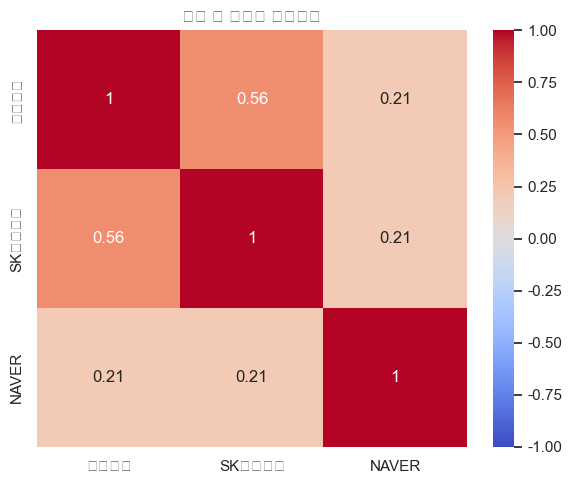

/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7t/fqym1zdd1k56vvlfrlpf7fgc0000gn/T/ipykernel_46071/1756695009.py:39: Us

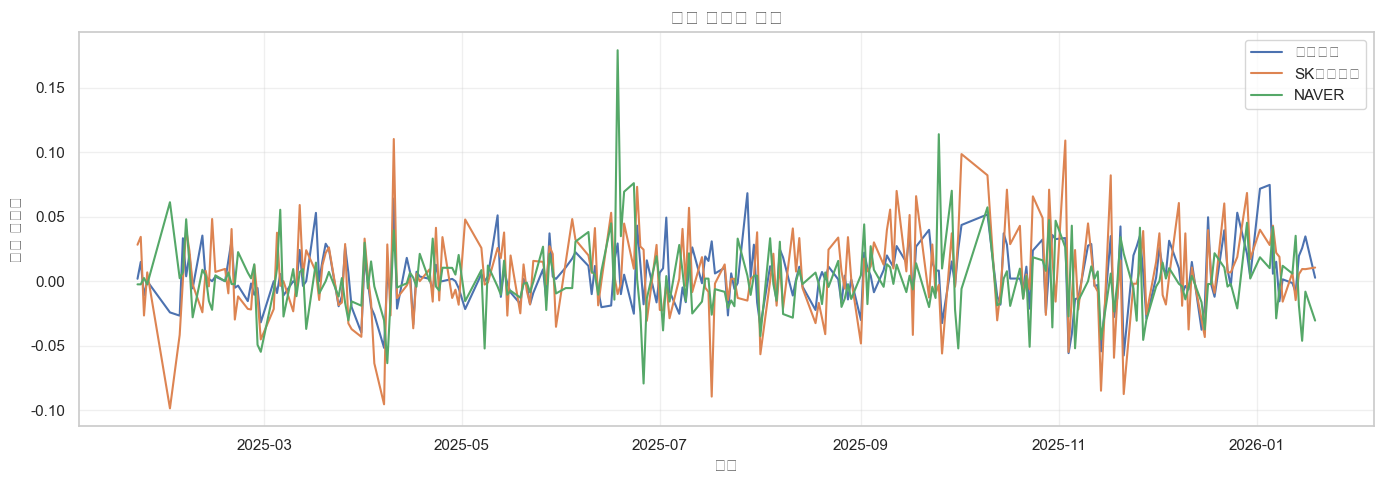

In [11]:
# =============================================================================
# 11. 종목 간 비교 분석 (상관관계/히트맵/수익률 비교)
# =============================================================================
# 학습 목표: 상관관계를 통해 분산 투자 효과를 분석한다
# Java 비유: 여러 리스트를 Key로 묶어 비교 통계를 내는 방식과 유사

# 일별 수익률 데이터프레임 생성
return_df = pd.DataFrame({
    "삼성전자": samsung_df["return_pct"] / 100 if samsung_df is not None else pd.Series(dtype="float"),
    "SK하이닉스": sk_hynix_df["return_pct"] / 100 if sk_hynix_df is not None else pd.Series(dtype="float"),
    "NAVER": naver_df["return_pct"] / 100 if naver_df is not None else pd.Series(dtype="float"),
}).dropna(how="all")

# 상관관계 행렬
corr_matrix = return_df.corr()
print("📌 상관관계 행렬")
print(corr_matrix)

# 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("종목 간 수익률 상관관계", fontsize=12)
plt.tight_layout()

output_path = OUTPUT_DIR / "return_correlation_heatmap.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

# 일별 수익률 비교 차트
plt.figure(figsize=(14, 5))
for col in return_df.columns:
    plt.plot(return_df.index, return_df[col], label=col)

plt.title("일별 수익률 비교", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("일별 수익률")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

output_path = OUTPUT_DIR / "daily_return_comparison.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


In [12]:
# =============================================================================
# 12. 리스크 분석 (일별 변동성, 최대 손실폭, VaR)
# =============================================================================
# 학습 목표: 손실 위험을 정량화하는 핵심 지표를 계산한다
# Java 비유: 리스크 지표를 별도 계산 모듈로 분리하는 방식과 유사

def analyze_risk(name: str, df: pd.DataFrame | None) -> pd.DataFrame | None:
    """
    일별 변동성, 최대 손실폭, VaR(95%)를 계산한다.
    """
    if df is None:
        print(f"⚠️ 데이터 없음: {name}")
        return None

    df = df.copy()

    daily_return = df["return_pct"] / 100

    # 1) 일별 변동성 (20일 rolling 표준편차)
    df["daily_volatility_20"] = daily_return.rolling(window=20).std()

    # 2) 최대 손실폭 (Drawdown)
    cumulative = (1 + daily_return).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative / running_max) - 1
    df["drawdown"] = drawdown
    max_drawdown = drawdown.min()

    # 3) VaR 95% (하위 5% 수익률)
    var_95 = daily_return.quantile(0.05)

    print(f"✅ {name} 리스크 분석")
    print(f"- 최대 손실폭 (Max Drawdown): {max_drawdown:.2%}")
    print(f"- VaR 95%: {var_95:.2%}")

    return df


samsung_df = analyze_risk("삼성전자", samsung_df)
sk_hynix_df = analyze_risk("SK하이닉스", sk_hynix_df)
naver_df = analyze_risk("NAVER", naver_df)


✅ 삼성전자 리스크 분석
- 최대 손실폭 (Max Drawdown): -14.67%
- VaR 95%: -2.90%
✅ SK하이닉스 리스크 분석
- 최대 손실폭 (Max Drawdown): -26.45%
- VaR 95%: -4.34%
✅ NAVER 리스크 분석
- 최대 손실폭 (Max Drawdown): -26.16%
- VaR 95%: -3.84%
